In [1]:
import pandas as pd
import networkx as nx
import pickle
import numpy as np
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests

In [158]:
cols = [ i for i in range(200)]
print(cols)
dataset1 = pd.read_csv('GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct', index_col = 'Name', usecols = cols, sep = '\t', header = 2 , nrows = 100)
dataset = dataset1.drop('Description', axis = 1)
print(len(dataset))

for i in dataset.index.values:
    if np.sum(dataset.loc[i].values) == 0.0:
        dataset = dataset.drop(i, axis=0)
            
dataset

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
100


,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,...,GTEX-15SDE-2426-SM-7KFRC,GTEX-15UKP-0526-SM-7KFRO,GTEX-16AAH-2026-SM-7LG5F,GTEX-16BQI-0526-SM-6PAM8,GTEX-16GPK-0226-SM-7DUFI,GTEX-16MT8-0526-SM-6PAM6,GTEX-16MTA-2126-SM-6PALC,GTEX-16NGA-1826-SM-7LG5L,GTEX-16NPX-0326-SM-7EWDI,GTEX-16XZY-2526-SM-7DHL2
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,0.10820,0.11580,0.02104,0.02329,0.00000,0.04641,0.03076,0.09358,0.12100,0.02859,...,0.09117,0.02505,0.11160,0.20710,0.06999,0.1796,0.18970,0.13420,0.03265,0.15930
ENSG00000227232.4,21.40000,11.03000,16.75000,8.17200,7.65800,9.37200,10.08000,13.56000,9.88900,9.12100,...,18.44000,9.46400,10.44000,11.98000,9.87200,13.9100,11.85000,7.54000,13.94000,11.15000
ENSG00000243485.2,0.16020,0.06433,0.04674,0.00000,0.05864,0.00000,0.13670,0.20790,0.05375,0.06351,...,0.04050,0.00000,0.14880,0.09200,0.05182,0.4388,0.22980,0.12780,0.07253,0.00000
ENSG00000237613.2,0.05045,0.00000,0.02945,0.03260,0.00000,0.00000,0.08610,0.13100,0.06773,0.00000,...,0.10210,0.07011,0.09373,0.05796,0.03265,0.2513,0.07240,0.02683,0.00000,0.03186
ENSG00000268020.2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.11080,0.05619,0.00000,0.00000,...,0.00000,0.04512,0.12070,0.11190,0.08406,0.1294,0.06213,0.00000,0.00000,0.04101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000127054.14,58.42000,54.11000,61.27000,40.30000,36.41000,43.43000,37.74000,52.61000,52.10000,51.49000,...,49.06000,44.08000,79.06000,48.53000,47.23000,54.5500,56.03000,43.44000,54.16000,42.78000
ENSG00000240731.1,28.04000,14.08000,28.92000,14.62000,17.73000,18.36000,14.14000,20.82000,18.93000,25.40000,...,21.11000,12.51000,33.15000,17.85000,18.46000,23.3300,24.31000,15.68000,16.74000,18.01000
ENSG00000224051.2,27.55000,29.09000,31.05000,21.58000,24.00000,29.10000,24.56000,32.60000,32.98000,18.34000,...,26.58000,25.66000,22.16000,25.65000,29.23000,20.8400,26.38000,28.59000,28.35000,20.63000


In [159]:
new_dataset = pd.DataFrame()
new_dataset['Name'] = dataset.index.values
new_dataset = new_dataset.set_index('Name')
seed = 0
for col in dataset.columns:
    np.random.seed(seed)
    seed += 1
    permuted_values = dataset[col].to_list()
    np.random.shuffle(permuted_values)
    new_dataset[col] = permuted_values
    
new_dataset

,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,...,GTEX-15SDE-2426-SM-7KFRC,GTEX-15UKP-0526-SM-7KFRO,GTEX-16AAH-2026-SM-7LG5F,GTEX-16BQI-0526-SM-6PAM8,GTEX-16GPK-0226-SM-7DUFI,GTEX-16MT8-0526-SM-6PAM6,GTEX-16MTA-2126-SM-6PALC,GTEX-16NGA-1826-SM-7LG5L,GTEX-16NPX-0326-SM-7EWDI,GTEX-16XZY-2526-SM-7DHL2
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.4,0.0000,13.98000,14.33000,53.99000,5.07200,0.6243,1.03300,0.1466,0.09343,9.73500,...,3.57900,0.00000,5.8820,17.51000,1.29700,0.33520,0.31630,3.0670,61.01000,0.04482
ENSG00000227232.4,17.0700,0.66290,0.04238,14.62000,0.09854,0.0000,0.00000,0.0000,6.32400,0.05129,...,1.12300,44.08000,0.5951,0.11190,0.04963,0.61090,11.41000,1.0130,16.27000,0.13950
ENSG00000243485.2,0.1602,25.30000,0.00000,0.00000,0.00000,5.1100,0.15530,0.0000,10.32000,0.00000,...,2.36200,1.55000,79.0600,0.38780,0.30850,0.35620,0.17470,0.4945,0.00000,0.04101
ENSG00000237613.2,0.1752,41.98000,0.21240,153.50000,0.10980,6.8230,8.46400,1.3820,0.09528,0.40550,...,0.29110,0.04512,1.8520,0.33570,1.84800,19.36000,0.00000,73.7500,8.49400,0.15930
ENSG00000268020.2,12.6300,2.41500,0.31490,0.93140,0.00000,46.7500,0.03076,0.0657,0.32250,0.00000,...,0.07389,0.00000,0.2274,0.08081,0.15370,6.55900,2863.00000,0.4535,0.08240,0.48090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000127054.14,28.0400,0.00000,0.31770,0.02329,20.13000,0.0547,2.73300,176.7000,0.12550,44.60000,...,0.00000,0.15140,4.9000,11.98000,1.97700,11.90000,28.05000,7.8890,0.06821,0.03935
ENSG00000240731.1,0.5223,8.64300,0.00000,0.04179,7.65800,5.2020,1.47200,0.5649,24.67000,0.14740,...,0.04050,0.00000,0.5390,14.56000,0.24880,0.55530,931.60000,0.0000,3.70900,28.95000
ENSG00000224051.2,0.8845,0.07793,0.07549,0.10610,13.81000,0.3104,12.42000,0.1264,0.00000,0.18590,...,12.62000,0.00000,1.5170,0.32780,10.95000,10.66000,0.09388,0.1942,0.04543,102.10000


In [160]:
def get_total_discoveries(alpha, bootstrapped_individuals):

    #individuals = dataset.index.values

    p_values = []
    corr_values = []

    count = 0
    for i in bootstrapped_individuals:
        for j in bootstrapped_individuals:

            count = count + 1
            if(count%10000 == 0):
                print(count)

            gene1 = dataset.loc[i].values
            gene2 = dataset.loc[j].values

            corr, p = spearmanr(gene1, gene2) #calculated spearman correlation for each pair

            corr_values.append(corr)
            p_values.append(p)

    results = multipletests(p_values, alpha = alpha, method='fdr_bh')
    reject = results[0]

    total_discoveries = np.sum(np.array(reject) == False)
    
    return total_discoveries

In [161]:
#total_discoveries = get_total_discoveries()
#total_discoveries

In [162]:
def get_false_positives(alpha, bootstrapped_individuals):
    
    #individuals = new_dataset.index.values

    p_values = []
    corr_values = []

    count = 0
    for i in bootstrapped_individuals:
        for j in bootstrapped_individuals:

            count = count + 1
            if(count%10000 == 0):
                print(count)

            gene1 = new_dataset.loc[i].values
            gene2 = new_dataset.loc[j].values

            corr, p = spearmanr(gene1, gene2) #calculated spearman correlation for each pair

            corr_values.append(corr)
            p_values.append(p)

    false_positives = np.sum(np.array(p_values) > alpha)
    
    return false_positives

In [163]:
#false_positives = get_false_positives()
#false_positives

In [164]:
def get_empirical_fdr(bootstrapped_individuals):
    
    alphas = [i*0.1 for i in range(10)]
    empirical_fdrs = []

    for alpha in alphas:
        total_discoveries = get_total_discoveries(alpha, bootstrapped_individuals)
        false_positives = get_false_positives(alpha, bootstrapped_individuals)

        empirical_fdr = false_positives * 1.0 / total_discoveries
        print(alpha, empirical_fdr)

        empirical_fdrs.append(empirical_fdr)

    return (alphas,empirical_fdrs)

In [171]:
def get_bootstrapped_individuals():
    
    individuals = dataset.index.values
    bootstrapped_individuals = np.random.choice(individuals, len(individuals), replace=True)  #Get bootstrapped samples
    
    return bootstrapped_individuals

0.0 1.0
0.1 1.2115606936416186
0.2 1.2255836895757974
0.30000000000000004 1.1359602413915513
0.4 1.131174089068826
0.5 1.0372413793103448
0.6000000000000001 0.9822389666307858
0.7000000000000001 0.8623052959501558
0.8 0.7389885807504079
0.9 0.6159217877094972
[1.0, 1.2115606936416186, 1.2255836895757974, 1.1359602413915513, 1.131174089068826, 1.0372413793103448, 0.9822389666307858, 0.8623052959501558, 0.7389885807504079, 0.6159217877094972]
0.0 1.0
0.1 1.205336426914153
0.2 1.1994210357027983
0.30000000000000004 1.198612632347572
0.4 1.154601226993865
0.5 1.077752808988764
0.6000000000000001 0.9953149401353462
0.7000000000000001 0.9187848729076256
0.8 0.8363171355498721
0.9 0.708092485549133
[1.0, 1.205336426914153, 1.1994210357027983, 1.198612632347572, 1.154601226993865, 1.077752808988764, 0.9953149401353462, 0.9187848729076256, 0.8363171355498721, 0.708092485549133]
0.0 1.0
0.1 1.2185314685314685
0.2 1.2453016815034619
0.30000000000000004 1.2035302593659942
0.4 1.1369643572286745
0.

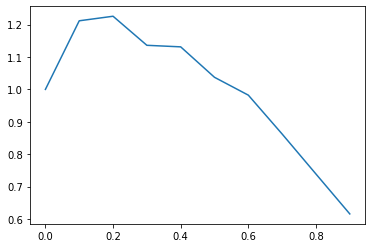

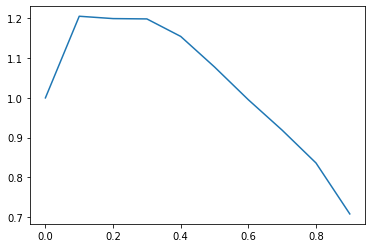

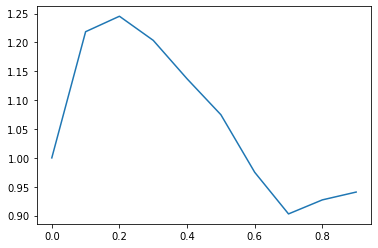

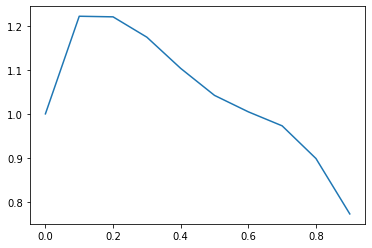

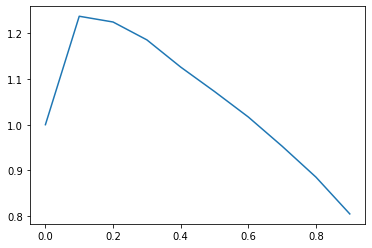

In [172]:
B = 5
for i in range(B):
    bootstrapped_individuals = get_bootstrapped_individuals()
    alphas,empirical_fdrs = get_empirical_fdr(bootstrapped_individuals)
    
    plt.figure()
    plt.plot(alphas, empirical_fdrs)
    print(empirical_fdrs)
plt.show()    

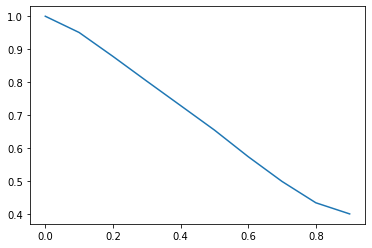

In [145]:
import matplotlib.pyplot as plt
plt.plot(alphas, empirical_fdrs)
plt.show()

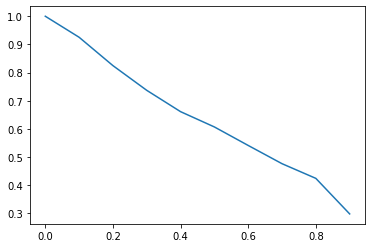

In [98]:
import matplotlib.pyplot as plt
plt.plot(alphas, empirical_fdrs)
plt.show()

In [32]:
data = {'Name':['Tom', 'nick', 'krish', 'jack'],
        'Age':[20, 21, 19, 18]}

# Create DataFrame
df = pd.DataFrame(data)
df

,Name,Age
0,Tom,20
1,nick,21
2,krish,19
3,jack,18


In [33]:
new_df = pd.DataFrame()
seed = 0
for col in df.columns:
    np.random.seed(seed)
    seed += 1
    permuted_values = df[col].to_list()
    np.random.shuffle(permuted_values)
    new_df[col] = permuted_values
    
print(new_df)

    Name  Age
0  krish   18
1   jack   19
2   nick   20
3    Tom   21


In [169]:
individuals = [1, 2, 3, 4, 5]
def get_boot():
    array = np.random.choice(individuals, len(individuals), replace=True)
    return array

In [170]:
for i in range(4):
    print(get_boot())

[2 2 2 3 2]
[4 3 4 3 3]
[3 2 3 5 3]
[5 4 2 1 4]
